In [3]:
import pandas as pd
import time, datetime, tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import utils

In [2]:
tini, tend = datetime.datetime(2024, 4, 30, 8, 0, 0), datetime.datetime(2024, 5, 14, 8, 0, 0)
data, data_err = utils.load_data(tini, tend)

In [9]:
# calib = utils.load_calib(
#     path="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 14:25:00.pkl"
#     )["40525"]

# for index, row in tqdm.tqdm(data.iterrows(), total=len(data), desc="Processing data..."):
#     try:
#         mapping = utils.load_mapping(date=index)
#     except:
#         continue
#     tprofile, tprofile_err = {}, {}
#     fig, axes = plt.subplots(1,1)
#     for channel in row.index:
#         mapping_row = mapping.loc[(mapping["SC-ID"]==channel)]
#         system = mapping_row["SYSTEM"].values[0]
#         if system != "TGRAD":
#             continue
#         try:
#             sensor_id = str(int(mapping_row["CAL-ID"].iloc[0]))
#         except:
#             continue
#         if sensor_id not in calib.index:
#             continue
#         tprofile[int(mapping_row["Y"].iloc[0])] = row[channel] - 1e-3*calib.loc[sensor_id]["cc"]
#         tprofile_err[int(mapping_row["Y"].iloc[0])] = (data_err.loc[index][channel] + 1e-3*calib.loc[sensor_id]["cc_err"])
#     try:
#         axes.errorbar(tprofile.keys(), 1e3*(np.array(list(tprofile.values())) - tprofile[305]), yerr=1e3*np.array(list(tprofile_err.values())), fmt=".", capsize=5)
#         axes.set_title(fr"{index}")
#         axes.set_ylim(-40, 40)
#         axes.set_ylabel("Temperature (mK)")
#         fig.savefig(fr"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/first_poff/poff_2024-12-03 14:25:00_tgrad_profiles/{index}.pdf", format="pdf")
#         plt.close(fig)
#     except:
#         continue

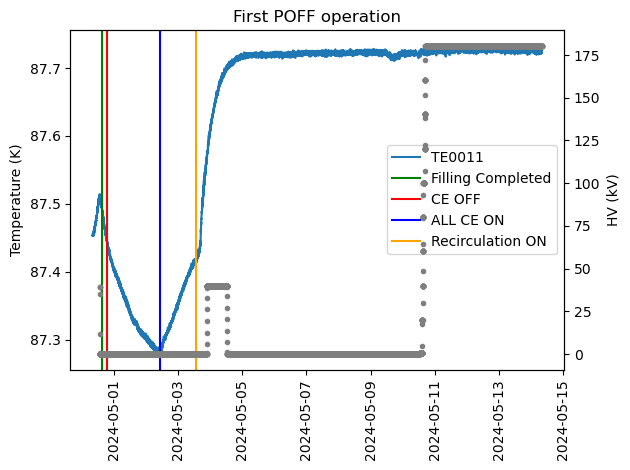

In [25]:
channel = "TE0011"
fig, axes = plt.subplots(1,1)
plt.xticks(rotation=90);
plt.title("First POFF operation")
axes2 = axes.twinx()

conditions = (data[channel]<90)&(data[channel]>86)

axes.plot(data.loc[conditions].index.to_numpy(), data.loc[conditions][channel].to_numpy(), label=fr"{channel}")
axes.axvline(datetime.datetime(2024, 4, 30, 14, 46, 0), color="green", label="Filling Completed")
axes.axvline(datetime.datetime(2024, 4, 30, 18, 45, 0), color="red", label="CE OFF")
#axes.axvline(datetime.datetime(2024, 5, 1, 15, 0, 0), color="red", label="LOWER CE ON")
#axes.axvline(datetime.datetime(2024, 5, 1, 17, 0, 0), color="red", label="UPPER CE ON")
axes.axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), color="blue", label="ALL CE ON")
axes.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), color="orange", label="Recirculation ON")
axes.legend(loc="center right")
axes2.plot(data.index.to_numpy(), 1e-3*data["Heinz_VRaw"].to_numpy(), ".", color="tab:grey")
axes.set_ylabel("Temperature (K)")
axes2.set_ylabel("HV (kV)")
fig.tight_layout()
fig.savefig("/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/first_poff/tevolution.png", format="png")
# data["TE0001"].loc[(data["TE0001"]<90)&(data["TE0001"]>87)].plot()
# data["Heinz_VRaw"].plot()

Text(0, 0.5, 'Temperature (mK)')

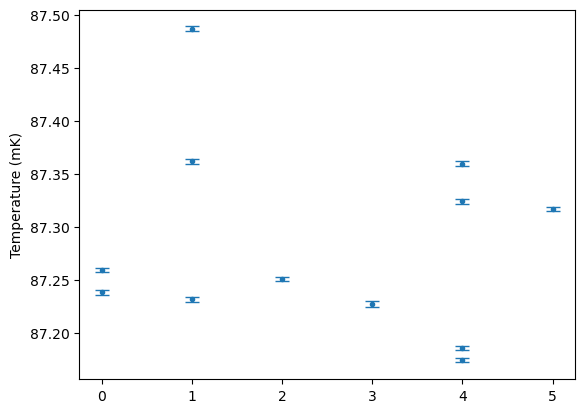

In [36]:
calib = utils.load_calib(
    path="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 14:25:00.pkl"
    )["40525"]

date = datetime.datetime(2024, 5, 2, 12, 0, 0)
mapping = utils.load_mapping(date=date)

index = str(date)
row = data.loc[index]

tprofile = {}
fig, axes = plt.subplots(1,1)
for channel in row.index:
    mapping_row = mapping.loc[(mapping["SC-ID"]==channel)]
    system = mapping_row["SYSTEM"].values[0]
    if system != "APA":
        continue
    try:
        sensor_id = str(int(mapping_row["CAL-ID"].iloc[0]))
    except:
        continue
    if sensor_id not in calib.index:
        continue
    tprofile[sensor_id] = {
        "temp":row[channel] - 1e-3*calib.loc[sensor_id]["cc"],
        "temp_err":(data_err.loc[index][channel] + 1e-3*calib.loc[sensor_id]["cc_err"]),
        "Y":mapping_row["Y"].iloc[0],
        "X":mapping_row["X"].iloc[0],
        "Z":mapping_row["Z"].iloc[0],
        }
tprofile = pd.DataFrame(tprofile).T
axes.errorbar(tprofile["Y"].to_numpy(), tprofile["temp"].to_numpy(), yerr=tprofile["temp_err"], fmt=".", capsize=5)
#axes.set_title(fr"{index}: HV={1e-3*row['Heinz_VRaw']:.0f} kV")
#axes.set_ylim(-40, 40)
axes.set_ylabel("Temperature (mK)")
#fig.savefig(fr"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/HV_analysis/{index}: HV={1e-3*row['Heinz_VRaw']:.0f} kV.pdf", format="pdf")
#plt.close(fig)

In [6]:
calib = utils.load_calib(
    path="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 14:25:00.pkl"
    )["40525"]

gradient = {}
data, data_err = utils.load_data(tini=datetime.datetime(2024, 4, 29, 12, 0, 0), tend=datetime.datetime(2024, 5, 5, 12, 0, 0))
for index, row in tqdm.tqdm(data.iterrows(), total=len(data), desc="Processing data..."):
    if index > datetime.datetime(2024, 5, 5, 12, 0, 0):
        continue
    try:
        mapping = utils.load_mapping(date=index)
    except:
        continue
    tprofile, tprofile_err = {}, {}
    for channel in row.index:
        mapping_row = mapping.loc[(mapping["SC-ID"]==channel)]
        system = mapping_row["SYSTEM"].values[0]
        if system != "TGRAD":
            continue
        try:
            sensor_id = str(int(mapping_row["CAL-ID"].iloc[0]))
        except:
            continue
        if sensor_id not in calib.index:
            continue
        tprofile[sensor_id] = {
            "temp":row[channel] - 1e-3*calib.loc[sensor_id]["cc"],
            "temp_err":(data_err.loc[index][channel] + 1e-3*calib.loc[sensor_id]["cc_err"]),
            "Y":mapping_row["Y"].iloc[0],
            "X":mapping_row["X"].iloc[0],
            "Z":mapping_row["Z"].iloc[0],
            "name":mapping_row["NAME"].iloc[0],
            }
    tprofile = pd.DataFrame(tprofile).T
    bottom = tprofile.loc[(tprofile["Y"]< 600)]
    middle = tprofile.loc[(tprofile["Y"]>3500)&(tprofile["Y"]<5000)]
    top = tprofile.loc[(tprofile["Y"]>6200)]
    gradient[index] = {
        "mb":(middle["temp"].mean() - bottom["temp"].mean()),
        "mt":(middle["temp"].mean() - top["temp"].mean()),
        "tb":(top["temp"].mean() - bottom["temp"].mean())
    }

Processing data...: 100%|██████████| 8639/8639 [05:14<00:00, 27.51it/s] 


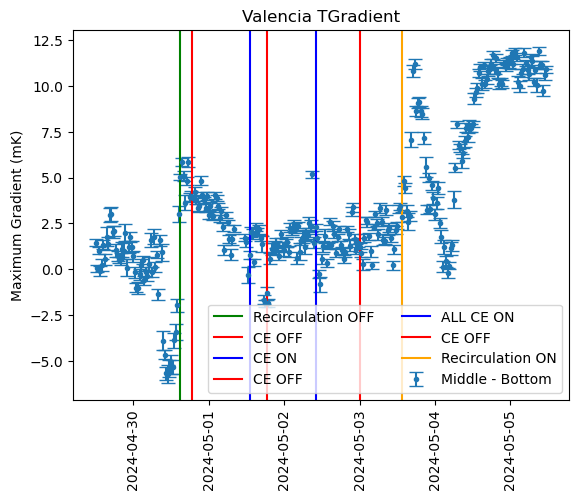

In [7]:
grad = pd.DataFrame(gradient).T
plt.errorbar(grad.resample("30min").mean().index.to_numpy(),
         1e3*grad.resample("30min").mean()["mb"].to_numpy(),
         yerr=1e3*grad.resample("30min").sem()["mb"].to_numpy(),
         fmt=".", capsize=5, label="Middle - Bottom")

# plt.errorbar(grad.resample("10min").mean().index.to_numpy(),
#          1e3*grad.resample("10min").mean()["mt"].to_numpy(),
#          yerr=1e3*grad.resample("10min").sem()["mt"].to_numpy(),
#          fmt=".", capsize=5, label="Middle - Top")

# plt.errorbar(grad.resample("10min").mean().index.to_numpy(),
#          1e3*grad.resample("10min").mean()["tb"].to_numpy(),
#          yerr=1e3*grad.resample("10min").sem()["tb"].to_numpy(),
#          fmt=".", capsize=5, label="Top - Bottom")
plt.axvline(datetime.datetime(2024, 4, 30, 14, 46, 0), color="green", label="Recirculation OFF")
plt.axvline(datetime.datetime(2024, 4, 30, 18, 45, 0), color="red", label="CE OFF")
plt.axvline(datetime.datetime(2024, 5, 1, 13, 0, 0), color="blue", label="CE ON")
plt.axvline(datetime.datetime(2024, 5, 1, 18, 30, 0), color="red", label="CE OFF")
plt.axvline(datetime.datetime(2024, 5, 2, 10, 8, 0), color="blue", label="ALL CE ON")
plt.axvline(datetime.datetime(2024, 5, 3, 0, 0, 0), color="red", label="CE OFF")
plt.axvline(datetime.datetime(2024, 5, 3, 13, 30, 0), color="orange", label="Recirculation ON")
plt.xticks(rotation=90);
plt.ylabel("Maximum Gradient (mK)")
plt.title("Valencia TGradient")
plt.legend(loc="best", ncol=2)
#plt.ylim(10, 30)
#plt.xlim(datetime.datetime(2024, 4, 30, 8, 0, 0), datetime.datetime(2024, 5, 5, 12, 0, 0))